# Design with the Root Locus


The root locus is a graphical method used to analyze how the roots (poles) of a system's characteristic equation change as a parameter, typically the controller gain ($K$), varies. It helps us understand how the system's stability and transient response depend on the control gain.

Many industrial control systems are designed using either the root locus approach or the frequency domain approach (based on Bode plots). These methods ensure that the system meets performance requirements.

## Example Problem

Let's consider an example to apply the root locus method. We have a plant with the transfer function:

$$
G(s) = \frac{5}{s(\frac{1}{6}s+1)(0.5s + 1} = \frac{60K_A}{s(s+2)(s+6)}
$$

This plant model represents a motor servo system, where the output is the position, and the input is the manipulated signal.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_1.png" alt="23_Design_with_the_root_locus_example_1" style="width:550px;"/>
    </td>           
</tr>
</table>


As usual, the first thing we would like to understand is if a controller gain can solve our problem.

#### Steady-State Accuracy and Transient Requirements

Our design strategy is to first meet the transient performance and steady-state accuracy requirements and then check for robustness and disturbance rejection. 

Remember that transient requirements include relative stability and speed of response.
- Relative stability is related to peak overshoot, which can be specified using the damping ratio ($\zeta$) or the percent overshoot ($M_p$).
- The speed of response can be specified using settling time ($t_s$), rise time ($t_r$), or natural frequency ($\omega_n$).

In the context of second-order systems, it's important to remember to check for the **'dominance condition.'** This condition ensures that the main characteristics of a system are governed by its dominant poles. If the dominance condition is met, great! However, if it's not, we need to address the influence of other poles, like third poles, on the system's performance. This is a crucial aspect to consider when tackling a design problem.


**Requirements**
- Steady-state accuracy: $K_v \ge 5 $ or $e_{ss} \le 0.2$

In control system design, we often focus on steady-state accuracy. For a type-1 system like ours, steady-state error to a step input is zero. Therefore, we specify the steady-state accuracy in terms of the velocity error constant, $K_v$. In this example, we want $K_v$ to be greater than or equal to 5.

To satisfy the steady-state accuracy requirement, we need to select an appropriate gain, $K_A$. Given that we would like to focus on a pure gain adjustment, and we have a type-1 system, then the acceleration constant is always $K_a=0$ and the steady-state error to parabolic inputs is infinite. The system will not be able to follow acceleration inputs.

Note also that this discussion means that for this system any stead-state requirement must be specified in terms of accuracy to ramp inputs. It is the only input that makes sense to analyse. If we restrict to selecting a pure gain, the error to step is alway zero; error to ramp is always inifite.


### Root Locus Analysis

The first thing to do is to put the transfer function in the root locus form. In this case:

$$
G(s) = \frac{60K_A}{s(s+2)(s+6)} = \frac{K}{s(s+2)(s+6)} 
$$

where $K=60K_A$ is the root locus gain.


In this case, we can calculate $K_v$:

$$
K_v = \lim_{s\rightarrow0} s \frac{60K_A}{s(s+2)(s+6)} = 5K_A
$$

and our requirement is satisfied for $K_A=1$, and hence it is satisfied for a root locus gain $K=60$.


- We can draw a rough root locus plot and locate the poles when $K=60$ applying the magnitude condition. 



<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_2.png" alt="23_Design_with_the_root_locus_example_2" style="width:550px;"/>
    </td>           
</tr>
</table>



- From the position of the closed loop poles we can determine the damping angle $\theta$ and the damping ratio $\zeta=\cos(\theta) = 0.105$.

- We can also obtain the corresponding $\omega_n = 2.85$


#### Settling time
One key parameter to evaluate transient performance is settling time ($t_s$). Settling time represents how quickly the system reaches a steady-state after a disturbance or change in input. It is typically defined with respect to a 2 percent tolerance band around the final value.

The formula to calculate settling time is:

$$
t_s = \frac{4}{\zeta \cdot \omega_n} = 13.36\;\;sec
$$

where $\zeta$ is the damping ratio and $\omega_n$ is the natural frequency. We can easily calculate $t_s$ if we know $\zeta$ and $\omega_n$.


#### Dominance condition

In control system design, we aim for stability and satisfactory transient response. The dominance condition helps us determine whether we can neglect certain poles in the system.

The dominance condition states that if the complex conjugate poles that govern transient response are significantly farther to the left on the real axis than other poles, we can ignore the latter ones. This simplification allows us to focus on the dominant poles when analyzing transient performance.

In our case, the specific transient response characteristics only make sense if we have a pair of dominant poles.
In this case however, the dominance condition is certainly verified. The two closed loop are with real part less than one and the third pole is moving away from -6 towards $-\infty$. If this was not the case, we would have located the third pole usign the magnitude condition and verified explicitly the dominance condition.


Note that the relative stability is quite poor, the system oscillates and is very slow. With a simple amplifier we will not be able to meet the transient requirement while simultaneously meeting the steady-state accuracy.

### Meeting Transient Requirements

Let's consider an example where the user specifies transient requirements:

- Damping ratio ($\zeta$) equal to 0.6
- Settling time ($t_s$) less than or equal to 4 seconds

#### 1. Finding Dominant Poles

To satisfy the transient requirements, we need to locate dominant poles. We start by setting $\zeta$ to 0.6. Rememebr that if we focus on using a simple gain, we only have one degree of freedom and hence we need to choose the specific parameter we want to start with. 

By trial and error, we locate a point on the root locus plot that satisfies both the angle criterion and $\zeta$ requirement. This point represents the dominant poles.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_3.png" alt="23_Design_with_the_root_locus_example_3" style="width:550px;"/>
    </td>           
</tr>
</table>

#### 2. Evaluating Settling Time

Having found the dominant poles, we can calculate the settling time using the formula mentioned earlier. For the given design, the settling time is approximately 5.3 seconds:

$$
t_s = 5.3
$$

It is higher than 4s but potentially not too far off..


If we started from the settling time requirements we would need to consider what is the vertical line on the root locus plot that meets the requirements on the settling time.

Given $t_s$ we can calculate the corresponding $\zeta\omega_n$.

Note that, as usual with our rough plots, the specific point that we pick might not lie exactly on the root locus plot and we need to re-adjust the plot with trial and error (moving along the $t_s$ line with our trial points) until we have refined the plot as needed (the point satisfies the angle condition) and found the correct point corresponding to the desired closed loop poles.


You then calculate the corresponding $\zeta$ and verify if this is acceptable with respect to the requirements.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_4.png" alt="23_Design_with_the_root_locus_example_4" style="width:550px;"/>
    </td>           
</tr>
</table>

#### 3. Calculating the root locus gain $K$

Given the specific point selected, we apply the magnitude condition to calculate the root locus gain, which in this case $K=10.5$, and the corresponding $K_A = 10.5/60$.

#### 4. Steady-State Accuracy

To ensure that the system reaches the desired final value without error, we use the velocity error constant ($K_v$).

The formula to calculate $K_v$ is:

$$
K_v = \lim_{s \to 0} s \cdot G(s) = \frac{10.5}{12} = 0.825
$$

With a steady state error of $e_{ss} = 1.14$ rad.

The steady state error is too high to meet our specifications.

**A simple gain cannot meet our requirements unfortunately.**


### 2.5 Reassessing Design Requirements

The damping ratio determines how oscillatory the system's response will be. A lower $\zeta$ leads to a more oscillatory response, while a higher $\zeta$ leads to a more damped system.


We often face a trade-off in control system design between transient response (how quickly the system responds to changes) and steady-state accuracy (how accurately the system maintains its output over time).


Think of it as tuning a car's suspension: too stiff (high ζ), and it's not responsive enough; too soft (low ζ), and it oscillates too much.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_5.png" alt="23_Design_with_the_root_locus_example_5" style="width:550px;"/>
    </td>           
</tr>
</table>


_Figure: For $\zeta = 0.15$ (K = 60), the complex roots are located at a specific point on the plot and they move a s we modify the gain._

### Introducing a Zero to the System

As control system designers, we face a trade-off between transient and steady-state performance. By introducing a zero into the system, we can adjust the root locus to meet the transient requirements. However, this may affect the steady-state accuracy. We must carefully reassess the user's requirements and communicate the trade-offs to them.

To strike a balance between transient and steady-state performance, we introduce a zero into the system's transfer function at $s = -3$. This zero has a stabilizing effect and affects the root locus plot.

By introducing a zero at s = -3, we modify the system's dynamics. This can help balance our transient and steady-state requirements.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_6.png" alt="23_Design_with_the_root_locus_example_6" style="width:550px;"/>
    </td>           
</tr>
</table>


The plot has been pulled to the left, and hence the addition of a zero has stabilised the system. The system was osciallatory and had very poor relative stability properties. Adding a zero improves relative stability, it is similar to increasing the damping of the system. Adding a zero can be thought of as adding a "counter-weight" in our system that helps adjust its dynamic response.

We have now a PD compensator which effectively adds a zero to the forward path transfer function, enhancing system stability and response.

#### Understanding the Impact of Adding a Zero

When we say "the plot has been pulled to the left," we are referring to the root locus plot of our system. This leftward shift is significant because:

- **Stabilization of the System**: In control systems, moving the poles of a system to the left in the s-plane (which is what the root locus plot represents) generally means the system is becoming more stable.
  
- **Improving Relative Stability**: Originally, our system was oscillatory with poor relative stability. Think of relative stability as the system's ability to resist oscillations and remain stable under different conditions.

#### The Role of a PD (Proportional-Derivative) Compensator

- **What is a PD Compensator?**: A PD compensator is a type of controller used in control systems to improve the stability and response. It adjusts the control signal based on the current error (proportional part) and the rate of change of the error (derivative part).

- **Effect of a PD Compensator**: By adding a PD compensator to our system, we effectively add a zero to the forward path transfer function. This is like adding a carefully calculated counter-weight to our previously rocky boat, now making it more stable and responsive to changes.

A good way to illustrate this concept is to simulate the system's response with and without the PD compensator. Let's how the system's oscillations decrease and stability improves when the compensator is added.

Now, let's write the Python code. We'll simulate two systems: one without the PD compensator and one with it. 


### Python Code to Compare the Systems

To demonstrate how a system's oscillations decrease and its stability improves when a PD compensator is added, compared to a proportional controller, we'll use Python. We'll consider two cases: one with a proportional controller and the other with a PD controller.

First, let's define the system and the controllers:

1. **Original System (Proportional Controller)**:
   $$ G(s) = \frac{K}{s(s+2)(s+6)} $$
   For this example, let's assume \( K = 60K_A \). The exact value of \( K_A \) isn't specified, so we'll choose a value that demonstrates the system behavior.

2. **System with PD Controller**:
   $$ G(s) = \frac{16(s+3)}{s(s+2)(s+6)} $$
   Here, the zero at \( s = -3 \) represents the derivative action of the PD controller.

Both systems will be in a unity feedback configuration. We'll use the Python libraries `matplotlib` for plotting and `control` for control system analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

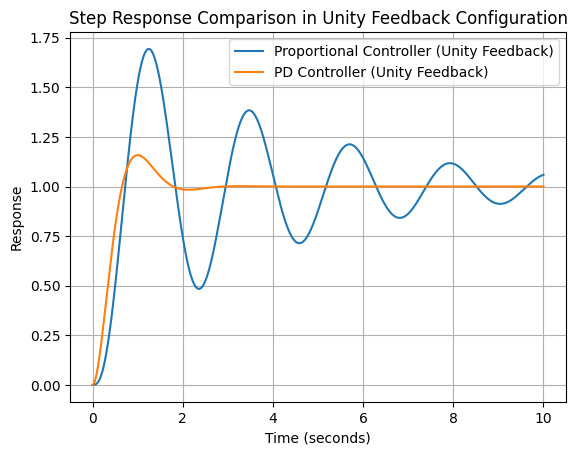

In [ ]:
# Define the transfer function of the original system (Proportional Controller)
K = 60  # Assuming a value for K
G_proportional = ctl.TransferFunction(K, [1, 8, 12, 0])

# Define the transfer function of the system with PD Controller
G_PD = ctl.TransferFunction([16, 48], [1, 8, 12, 0])

# Creating unity feedback loop for both systems
H = ctl.TransferFunction([1], [1])  # Unity feedback
closed_loop_proportional = ctl.feedback(G_proportional, H)
closed_loop_PD = ctl.feedback(G_PD, H)

# Time vector for simulation
time = np.linspace(0, 10, 1000)

# Step response for the Proportional Controller with unity feedback
t1, y1 = ctl.step_response(closed_loop_proportional, time)

# Step response for the PD Controller with unity feedback
t2, y2 = ctl.step_response(closed_loop_PD, time)

# Plotting
plt.figure()
plt.plot(t1, y1, label='Proportional Controller (Unity Feedback)')
plt.plot(t2, y2, label='PD Controller (Unity Feedback)')
plt.title('Step Response Comparison in Unity Feedback Configuration')
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

### Expected Outcome

The plot generated by this script will show the step responses of the two systems. You should observe that:

- The system with the proportional controller may exhibit more oscillations and a slower response.
- The system with the PD controller should show improved damping (less oscillation) and faster stabilization, thanks to the added zero at $ s = -3 $.

**Pop-Up Question**: How does adding a zero to a control system's forward path transfer function affect its stability?

**Answer**: Adding a zero typically improves the system's stability by making it less oscillatory and more resistant to disturbances, similar to increasing the system's damping.

Let's now consider a $\zeta = 0.6$ requirement and as usual let's put it on the root locus plot.



<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_7.png" alt="23_Design_with_the_root_locus_example_7" style="width:550px;"/>
    </td>           
</tr>
</table>



The forward path transfer function becomes:

$$
G(s) = \frac{(s+3)}{s(s+2)(s+6)}
$$

We can then calculate the gain at which we obtain the desired closed loop poles to obtain:

$$K = 16$$

And finally the settling time:

$$
t_s = \frac{4}{\zeta\omega_n} = 1.96\;\;sec
$$

and the velocity constant:

$$
K_v = \frac{16\cdot3}{12} = 4
$$

We had a requirement that $K_v \ge 5$ so we have not fully achieved it, but now with some trial and error we can obtian the performance that we desire.

**Dominance condition**:the third pole now lies in the $-6$ to $-3$ region and there is the risk that the dominance condition might be violated. If this was the case, we need to mitigate the effect of this pole. For example, if the distance cannot be 5 times we can try and make it at a distance which is three to four times the position of the right-most poles. Alternatively, instead of designing for $\zeta=0.6$ you can design for some other value.

Simulation will be helpful to understand the full effects.

Note also that if the third pole moves close enough to the zero their combined effect in closed-loop will be nullified and the system will behave as a second-order system. The dominance condition is respected.

#### Dealing with the Third Pole

In our system, we have a situation where the third pole is located in the region between -6 and -3. This creates a risk that the dominance condition may be violated, meaning this third pole could unduly influence the system's behavior. 


#### Strategies for Mitigating the Third Pole's Effect

1. **Distance Consideration**: Ideally, we want this third pole to be at least five times the distance away from the imaginary axis as the right-most poles. If this isn't possible, we aim for it to be three to four times the distance.

2. **Design Adjustments**: If maintaining the desired distance is challenging, we could redesign the system for a different damping ratio ($\zeta$), other than 0.6.

3. **Simulation Benefits**: Simulating the system's response with these variations will provide a clearer picture of how these changes affect performance.

**Instructor Note**: *Conduct a simulation showing the system's response with the third pole at different distances from the dominant poles and the zero. This will visually demonstrate the impact on system behavior.*

**THE SCRIPT BELOW HAS AN ERROR IN HOW THE RAMP STEADY STEATE ERROR IS CALCULATED. FIX IT**.

In [ ]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# import control as ctl
# from ipywidgets import interact, FloatSlider


# def calculate_settling_time(T, yout, tol=0.02):
#     # Settling time is the time at which the response remains within a certain tolerance
#     settled_value = yout[-1]
#     lower_bound = settled_value * (1 - tol)
#     upper_bound = settled_value * (1 + tol)
#     within_tol = np.where((yout >= lower_bound) & (yout <= upper_bound))[0]
#     if within_tol.size == 0:
#         return np.nan  # Return NaN if the system never settles
#     return T[within_tol[0]]

# def calculate_steady_state_error(system_type, G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     if system_type == 'step':
#         # Steady-state error for step input (Type 0 system)
#         T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
#         steady_state_val = yout[-1]
#         return 1 - steady_state_val
#     elif system_type == 'ramp':
#         # Steady-state error for ramp input (Type 1 system)
#         Kv = ctl.dcgain(G_closed_loop * ctl.TransferFunction([1, 0], [1]))
#         return 1 / Kv if Kv != 0 else np.inf
#     else:
#         return np.nan

# def plot_step_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
#     plt.plot(T, yout)
#     settling_time = calculate_settling_time(T, yout)
#     steady_state_error = calculate_steady_state_error('step', G, K, time_span)
#     plt.title(f'Step Response for Gain K={K}\nSettling Time: {settling_time:.2f}, Steady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)


# def plot_ramp_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.forced_response(G_closed_loop, T=time_span, U=time_span)
#     plt.plot(T, yout)
#     steady_state_error = calculate_steady_state_error('ramp', G, K, time_span)
#     plt.title(f'Ramp Response for Gain K={K}\nSteady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)



# def plot_root_locus_with_gain(K):
#     # Define the transfer function G(s)
#     numerator = [1, 3]
#     denominator = [1, 8, 12, 0]
#     G = ctl.TransferFunction(numerator, denominator)

#     # Calculate the closed-loop transfer function for the given gain
#     G_closed_loop = ctl.feedback(K * G)

#     # Find the poles for the specific gain
#     poles = ctl.pole(G_closed_loop)

#     # Plot the root locus
#     plt.figure(figsize=(10, 6))
#     ctl.root_locus(G, plot=True)

#     # Plot the poles for the specific gain
#     plt.plot(np.real(poles), np.imag(poles), 'ro', markersize=10, label=f'Poles for K={K}')

#     # Enhance plot
#     plt.xlabel('Real Axis')
#     plt.ylabel('Imaginary Axis')
#     plt.title(f'Root Locus of G(s) with Poles for Gain K={K}')
#     plt.grid(True)
#     plt.legend()
#     plt.show()
    
    
# def plot_all(K):
#     # Define the transfer function G(s)
#     numerator = [16, 48]
#     denominator = [1, 8, 12, 0]
#     G = ctl.TransferFunction(numerator, denominator)
    
#     # Time span for the responses
#     time_span = np.linspace(0, 10, 1000)

#     # Plot Root Locus
#     plot_root_locus_with_gain(K)

#     # Plot Step Response
#     plt.figure(figsize=(10, 4))
#     plot_step_response(G, K, time_span)
#     plt.show()

#     # Plot Ramp Response
#     plt.figure(figsize=(10, 4))
#     plot_ramp_response(G, K, time_span)
#     plt.show()
    

# # interact(plot_root_locus_with_gain, 
# #          K=FloatSlider(value=16, min=0, max=50, step=0.5, description='Gain K:'))

# interact(plot_all, 
#          K=FloatSlider(value=16, min=0, max=50, step=0.5, description='Gain K:'))


interactive(children=(FloatSlider(value=16.0, description='Gain K:', max=50.0, step=0.5), Output()), _dom_clas…

<function __main__.plot_all(K)>

#### Pole-Zero Cancellation

- **Moving Close to the Zero**: If the third pole moves sufficiently close to the zero we've added, their effects in the closed-loop system can cancel each other out. This makes the system behave like a second-order system, respecting the dominance condition.

- **Design Flexibility**: If the third pole is neither far enough from the dominant poles nor close enough to the added zero, we still have some flexibility. We can utilize the margin we have in the settling time (the time it takes for the system to stabilize) to adjust our design accordingly.


**Pop-Up Question**: Why is it important to respect the dominance condition in control system design?

**Answer**: Respecting the dominance condition ensures that the system behaves in a predictable and stable manner, primarily influenced by the dominant poles, and minimizes the impact of other less significant poles.

### Physical Realization of the Compensator

We have chosen a controller that is 

$$ D(s) = s + z_c $$

where $ z_c $ is the compensator zero, and this is added to enhance its transient response and stability. 


In practice, pure differentiators are avoided due to their sensitivity to high-frequency noise. 

Therefore, this types of compensators are usually implemented with an additional pole to attenuate high frequencies. 

The practical realization of this compensator includes adding a filter to reduce the impact of high frequency noise.

The actual compensator has the form:

$$
D(s) = \frac{s + z_c}{s + p_c} 
$$

Here, $ z_c $ is the zero and $ p_c $ is a pole introduced to filter high-frequency noise.

The purpose of this pole is not to help with the compensation part, so we want it to be far away from the rest of our poles and zeros. In our case, for example we could place it at -10 or farther. It might depend on the realisation requirements. Numerical accuracy might put specific constraints on how far it can be.

The addition of another pole modifies the root locus which becomes:



<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_8.png" alt="23_Design_with_the_root_locus_example_8" style="width:550px;"/>
    </td>           
</tr>
</table>

The addition of another pole has a destibilising effect. You need to choose the pole so that the root locus around our requirments is not disturbed. For example, $\zeta=0.6$ continues to lie on the root locus, and $K_v=4$ continues to be satisfied (at least approximately).

In this case the final performance are:

$$
\zeta = 0.6
$$

$$
t_s = 3.33\;\; sec
$$

$$
K_v = 1.7
$$

The velocity constant is now poorer! And hence we have higher steady-state error. We might need to adjust the compensator again. 

You need to adjust the zero-pole pair to achieve the desired performance. We have an additional degree of freedom.

Overall we can change: $z_c$, $p_c$ and $K_A$.

### Phase Lead Compensation

This type of controller is called Phase Lead Compensator. It adds a lead angle. This will become clearer when we discuss frequency-based design.

<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_9.png" alt="23_Design_with_the_root_locus_example_9" style="width:550px;"/>
    </td>           
</tr>
</table>

This network can be implemented as:

<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_10.png" alt="23_Design_with_the_root_locus_example_10" style="width:550px;"/>
    </td>           
</tr>
</table>

and its transfer function is:

$$
D(s) =  \frac{-R_F(sR_1C+1)}{sR_1R_2C+R_1R_2}
$$

and we can adjust the pole and zero locations choosing resistors and capacitors appropriately.



The transfer function above can be rearranged to have our typical form as:

$$
D(s) = \frac{-K_C(\tau s + 1)}{\alpha\tau s + 1}
$$

where

- $\tau = R_1C$
- $K_C = \frac{R_F}{R_1+R_2}$
- $\alpha = \frac{R_2}{R_1+R_2}$

## Effects of Adding a Pole at the Origin

**Impact on System Dynamics**

Placing a pole at the origin significantly affects both the transient and steady-state behavior of the system.

### Steady-State Accuracy
When a pole is added at the origin, the system's type number increases, which in turn increases the steady-state gain $ K_v $ to infinity for a ramp input. This improves the steady-state accuracy.

### Transient Response
However, adding a pole at the origin can adversely affect the system's transient response, potentially destabilizing the system for all values of gain $ K $.


### Visualizing Through Root Locus
To demonstrate this, we can draw the root locus of the system with an added pole at the origin. 
<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_11.png" alt="23_Design_with_the_root_locus_example_11" style="width:550px;"/>
    </td>           
</tr>
</table>




### Adding a zero close to the origin

To recover the stability we have to pull the system to the left, and to do this we can add a zero close to the origin.

Now the root locus becomes:

<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_11.png" alt="23_Design_with_the_root_locus_example_11" style="width:550px;"/>
    </td>           
</tr>
</table>

We are now using a controller of the form:

$$
D(s) = \frac{s+z_c}{z} = 1 + \frac{z_c}{s} = 1 + \frac{1}{T_is}
$$

which is a PI controller.

In [ ]:
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

def get_closed_loop_system(K, z_c, z=1):
    # Open-loop transfer function G(s)
    G = ctl.TransferFunction([K], [1, 8, 12, 0])

    # Compensator D(s)
    D = ctl.TransferFunction([1, z_c], [z, 0])

    # Combined system
    open_loop_system = G * D

    # Closing the loop with unity feedback
    return ctl.feedback(open_loop_system, 1)


def plot_root_locus(K, z_c=1):
    system = get_closed_loop_system(K, z_c)
    plt.figure(figsize=(10, 6))
    ctl.root_locus(system, plot=True)
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Root Locus with Gain K = {K}')
    plt.grid(True)
    plt.show()

    
interact(plot_root_locus, K=FloatSlider(value=1, min=0, max=100, step=.1, description='Gain K:'))
    

interactive(children=(FloatSlider(value=1.0, description='Gain K:'), IntSlider(value=1, description='z_c', max…

<function __main__.plot_root_locus(K, z_c=1)>

### Practical Approach: Phase Lag Compensator

The design of a phase lag compensator involves carefully selecting the locations of the compensator pole and zero to balance transient and steady-state requirements.

If we look back at our original specification, we did not have a specific requirement to have $K_v=0$ (which would have justified placing a pole at the origin).

Instead of placing the compensator pole exactly at the origin, placing it close to the origin can provide a more balanced design. This approach allows for flexibility in meeting both steady-state and transient accuracy requirements.

The compensator takes the form:

$$
D(s) = \frac{ s + z_c }{  s + p_c }
$$


This controller provides a negative angle contribution and for this reason is called Phase-Lag controller.


<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_13.png" alt="23_Design_with_the_root_locus_example_13" style="width:550px;"/>
    </td>           
</tr>
</table>


## Phase Lag Compensator: Practical Realization

The physical realization of a phase lag compensator typically involves using resistors and capacitors to create a network that mimics the desired transfer function.

A typical phase lag compensator can be realized using an operational amplifier (Op-Amp) circuit. The design involves selecting appropriate resistor and capacitor values to achieve the desired $s + z_c $ and $ s + p_c $ values.

<table>
<tr>
    <td>
        <img src="./pics/23_Design_with_the_root_locus_example_14.png" alt="23_Design_with_the_root_locus_example_14" style="width:550px;"/>
    </td>           
</tr>
</table>
